In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Embedding, GlobalAveragePooling1D
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

In [3]:
x_train = pad_sequences(x_train, maxlen=200)
x_test = pad_sequences(x_test, maxlen=200)

In [4]:
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=32, input_length=200))
model.add(GlobalAveragePooling1D())
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [5]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [6]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6562 - loss: 0.6240 - val_accuracy: 0.8584 - val_loss: 0.3501
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8811 - loss: 0.3007 - val_accuracy: 0.8714 - val_loss: 0.3066
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9131 - loss: 0.2268 - val_accuracy: 0.8804 - val_loss: 0.2914
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9278 - loss: 0.1869 - val_accuracy: 0.8610 - val_loss: 0.3278
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9435 - loss: 0.1615 - val_accuracy: 0.8580 - val_loss: 0.3528
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9547 - loss: 0.1350 - val_accuracy: 0.8728 - val_loss: 0.3335
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9607 - loss: 0.1243 - val_accuracy: 0.8732 - val_loss: 0.3418
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9605 - loss: 0.1164 - val_accuracy: 0.

In [8]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8608 - loss: 0.4246
Test Accuracy: 0.86


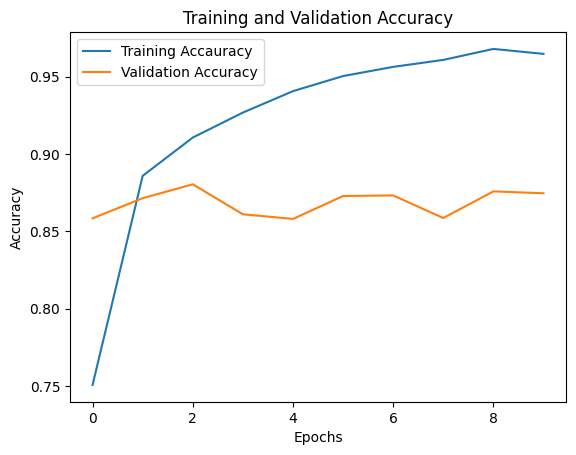

In [9]:
plt.plot(history.history['accuracy'], label="Training Accauracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training and Validation Accuracy")
plt.show()